In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px


In [203]:
data = pd.read_csv('/home/hasan/DATA SET/EDA/suicide-rates-overview-1985-to-2016/master.csv')

In [204]:
data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [205]:
data.shape

(27820, 12)

# Data Analysis

### Total Death in Every Year

In [206]:
year_sudicidePer100Popu = data.groupby(['year'])['suicides/100k pop'].sum()
fig = px.line(data, x=year_sudicidePer100Popu.index, y=year_sudicidePer100Popu.values, title='total death in every year in per 100k people')
fig.show()


### suicide number in every year

In [207]:
year_suicide = data.groupby(['year'])['suicides_no'].sum()
year_suicide.head()

year
1985    116063
1986    120670
1987    126842
1988    121026
1989    160244
Name: suicides_no, dtype: int64

In [208]:
fig = px.line(year_suicide, x=year_suicide.index, y=year_suicide.values, title='suicide in every year')
fig.show()

### Total suicide of male and female

In [209]:
male_female_suicide = data.groupby(['sex'])['suicides_no'].sum()
male_female_suicide

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

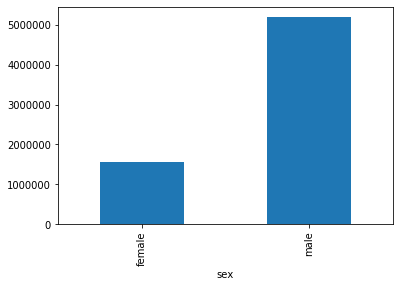

In [210]:
male_female_suicide.plot(kind='bar')

Male suicided more than Female around 3x

### suicide in every year based on sex and per100k populatin

In [211]:
year_sudicidePer100Popu = data.groupby(['year','sex'])['suicides_no'].sum()
year_sudicidePer100Popu

year  sex   
1985  female     32479
      male       83584
1986  female     33852
      male       86818
1987  female     35006
                 ...  
2014  male      171428
2015  female     47248
      male      156392
2016  female      3504
      male       12099
Name: suicides_no, Length: 64, dtype: int64

In [212]:
#only female suicide graph
female_data = data[data['sex']=='female']
male_data = data[data['sex']=='male']
female_data = female_data.groupby(['year']).suicides_no.sum() 
male_data = male_data.groupby(['year']).suicides_no.sum()

fig1 = px.line(x=female_data.index, y=female_data.values, title='female suicide number')
fig2 = px.line(x=male_data.index, y=male_data.values, title='male suicide number')
fig1.show()
fig2.show()

### Male Female suicide number in suicides/100k pop

In [213]:
per_100k = data.groupby(['year','sex'])['suicides/100k pop'].sum()
per_100k

year  sex   
1985  female    1663.75
      male      5148.14
1986  female    1674.05
      male      4905.79
1987  female    1857.21
                 ...   
2014  male      8220.01
2015  female    1731.09
      male      6522.90
2016  female     385.49
      male      1761.90
Name: suicides/100k pop, Length: 64, dtype: float64

### Number of suicide based on age

In [214]:
data['age'].unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [215]:
age_suicide = data.groupby(['age'])['suicides_no'].sum()
age_suicide

age
15-24 years     808542
25-34 years    1123912
35-54 years    2452141
5-14 years       52264
55-74 years    1658443
75+ years       653118
Name: suicides_no, dtype: int64

Text(0.5, 1.0, 'number of suicide based on age')

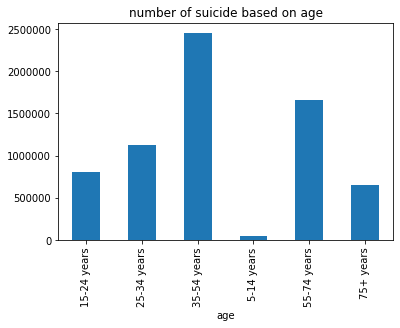

In [216]:
age_suicide.plot(kind='bar')
plt.title('number of suicide based on age')

### Suicide number of male and female based on age

In [217]:
age_suicide = data.groupby(['age','sex'])['suicides_no'].sum()
age_suicide

age          sex   
15-24 years  female     175437
             male       633105
25-34 years  female     208823
             male       915089
35-54 years  female     506233
             male      1945908
5-14 years   female      16997
             male        35267
55-74 years  female     430036
             male      1228407
75+ years    female     221984
             male       431134
Name: suicides_no, dtype: int64

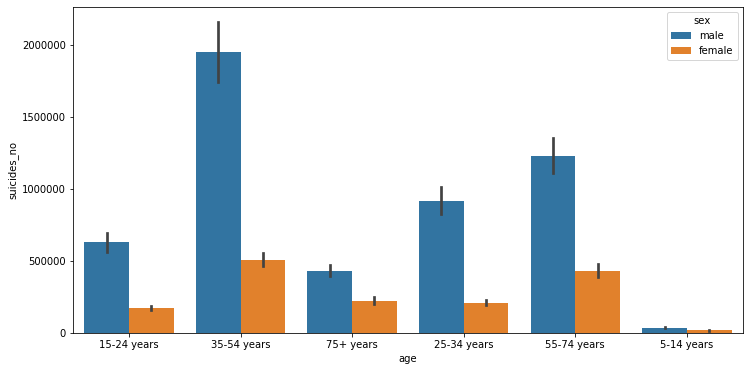

In [218]:
plt.figure(figsize=(12,6))
sns.barplot(data=data, x='age', y='suicides_no', hue='sex', estimator=sum)


### Most suicided country

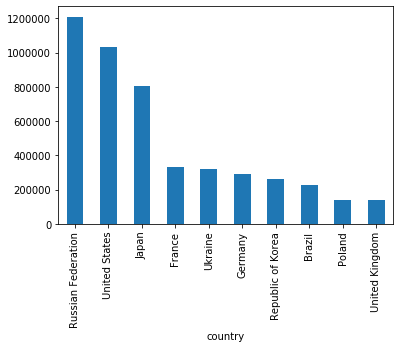

In [219]:
country_suicide = data.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False)
country_suicide.head(10).plot(kind='bar')

### Most suicided country in every year

In [245]:
uni_year = list(data['year'].unique())

l = []
c = []
s = []

for y in uni_year:
    year = data[data['year']==y]
    country_suicide = year.groupby(['country'])['suicides_no'].sum().sort_values(ascending=False)
    
    l.append(y)
    c.append(country_suicide.index[0])
    s.append(country_suicide.values[0])

In [246]:
value = np.array([np.arange(32)]*3).T
most_suicide_country = pd.DataFrame(value, columns=['year','country','suicides'])

In [247]:
most_suicide_country['year'] = l
most_suicide_country['country'] = c
most_suicide_country['suicides'] = s

In [249]:
most_suicide_country.sort_values('year', ascending=True)

,year,country,suicides
22,1985,United States,29446
23,1986,United States,30892
0,1987,United States,30783
1,1988,United States,30388
2,1989,Russian Federation,37921
24,1990,Russian Federation,39028
25,1991,Russian Federation,39281
3,1992,Russian Federation,45923
4,1993,Russian Federation,55846
5,1994,Russian Federation,61420


### USA

In [251]:
usa = data[data['country']=='United States']
usa.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,4346734000000,19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,4346734000000,19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,4346734000000,19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,4346734000000,19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,4346734000000,19693,Generation X


In [ ]:
#death per 100k in every year

In [257]:
usa_year_sudicidePer100Popu = usa.groupby(['year'])['suicides/100k pop'].sum()
fig = px.line(x=usa_year_sudicidePer100Popu.index, y=usa_year_sudicidePer100Popu.values, title='total death in every year in per 100k people')
fig.show()

In [ ]:
#gdp_per_capital vs suicide number

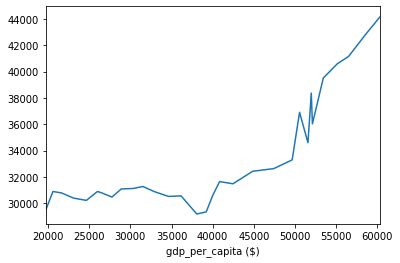

In [256]:
usa_gdp_suicide = usa.groupby(['gdp_per_capita ($)'])['suicides_no'].sum()
usa_gdp_suicide.plot()


suicide number increased when gdp_per_capital increased

In [258]:
#age group vs suicide number

In [261]:
usa_age_suicide = usa.groupby(['age'])['suicides_no'].sum()
usa_age_suicide

age
15-24 years    141679
25-34 years    182047
35-54 years    380917
5-14 years       8923
55-74 years    224770
75+ years       95677
Name: suicides_no, dtype: int64

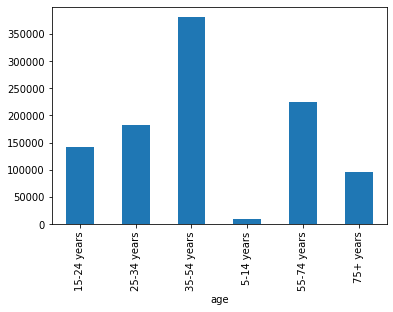

In [262]:
usa_age_suicide.plot(kind='bar')

In [265]:
#generation vs suicide number

In [266]:
usa_age_suicide = usa.groupby(['generation'])['suicides_no'].sum()
usa_age_suicide

generation
Boomers            354662
G.I. Generation     89865
Generation X       253704
Generation Z         2779
Millenials         104032
Silent             228971
Name: suicides_no, dtype: int64

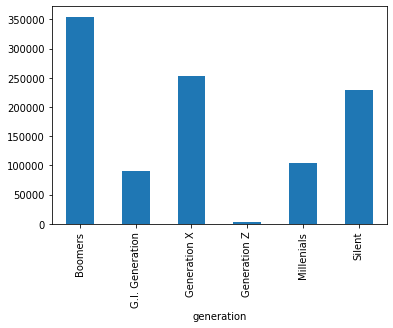

In [267]:
usa_age_suicide.plot(kind='bar')